In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

In [2]:

arr = np.array([
    ["Bus Stop", "Distance from First Station (km)", "Latitude", "Longitude"],
    ["Sarai Kale Khan ISBT", "0", "28.5870", "77.2591"],
    ["Railway Bridge Road", "1.2", "28.616118", "77.25037"],
    ["I.T.O(AGCR)", "2.5", "28.632430", "77.218780"],
    ["Delhi Gate", "3.7", "28.65035", "77.23869"],
    ["Red Fort","4.0","28.656473","77.242943"],
    ["ISBT Kashmiri Gate","4.3","28.6688","77.2309"],
    ["Old Secretariat","4.7","28.70346","77.21953"],
    ["Balak Ram Hospital","4.9","28.70519","77.22320"]
])

# Save to CSV
np.savetxt('location1.csv', arr, delimiter=',', fmt='%s', header='Bus Stop, Distance from First Station (km), Latitude, Longitude', comments='')


In [3]:
df = pd.read_csv('location1.csv')
print(df)

               Bus Stop  Distance from First Station (km)   Latitude  \
0              Bus Stop  Distance from First Station (km)   Latitude   
1  Sarai Kale Khan ISBT                                 0    28.5870   
2   Railway Bridge Road                               1.2  28.616118   
3           I.T.O(AGCR)                               2.5  28.632430   
4            Delhi Gate                               3.7   28.65035   
5              Red Fort                               4.0  28.656473   
6    ISBT Kashmiri Gate                               4.3    28.6688   
7       Old Secretariat                               4.7   28.70346   
8    Balak Ram Hospital                               4.9   28.70519   

   Longitude  
0  Longitude  
1    77.2591  
2   77.25037  
3  77.218780  
4   77.23869  
5  77.242943  
6    77.2309  
7   77.21953  
8   77.22320  


In [7]:
df.describe()


,Bus Stop,Distance from First Station (km),Latitude,Longitude
count,9,9,9,9
unique,9,9,9,9
top,Bus Stop,Distance from First Station (km),Latitude,Longitude
freq,1,1,1,1


In [9]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [10]:
import folium
import pandas as pd
import numpy as np

# Existing data
arr = np.array([
    ["Bus Stop", "Distance from First Station (km)", "Latitude", "Longitude"],
    ["Uttam Nagar Terminal", "0", "28.6256012539233", "77.065519911304"],
    ["Vikas Puri Xing", "1.2", "28.62750239261181", "77.0718547"],
    ["Dholi Piao", "2.5", "28.628968730020", "77.075582933514"],
    ["District Centre Najafgarh Road", "3.7", "28.63015792999023", "77.078153937171"],
    ["District Centre Outer Ring Road", "4.0", "28.632744618661075", "77.081088640547"],
    ["Kangra Niketan", "4.3", "28.6351904328079", "77.080345619820"],
    ["Krishna Park", "4.7", "28.6392354404110", "77.081577463331"],
    ["Manohar Nagar", "4.9", "28.6429404904222", "77.0830237820129"],
    ["Major Bhupinder Singh Nagar","5.1","28.6472747165280","77.084563128445"],
    ["Keshopur Depot","5.4","28.65302139373700","77.087629148579"],
    ["Meera Bagh","5.7","28.6588409552976","77.09098618235"],
    ["Sunder Apartment","6.0","28.66609624800558","77.0923127360158"],
    ["Peera Garhi Depot","6.5","28.67599617053243","77.093926998605"],
    ["Peera Garhi Chowk","6.8","28.68332822953620","77.09519179075974"],
    ["Mangol Puri B-Block","6.9","28.68913289531303","77.09617299004"],
    ["West Enclave","7.2","28.6937689370938","77.1024769513291"],
    ["Mangol Pur School","7.4","28.6954845922885","77.108819964775"],
    ["Rohini Depot III","7.7","28.6962254462253","77.111268004162"],
    ["Kali Mata Mandir","7.8","28.697445827195043","77.1159822002812"],
    ["Deepali Chowk","7.9","28.6983107921357","77.1194552368"],
    ["Saraswati Vihar C-Block","8.2","28.70017967747147","77.124846046993"],
    ["Madhuban Chowk","8.5","28.701947194070712","77.128036739258"]
    
])

# Create DataFrame with column headers
df = pd.DataFrame(arr[1:], columns=arr[0])

# Convert numerical columns to the correct data types
df["Latitude"] = pd.to_numeric(df["Latitude"])
df["Longitude"] = pd.to_numeric(df["Longitude"])

# Additional data for the new bus route
additional_arr = np.array([
    ["Bus Stop", "Distance from First Station (km)", "Latitude", "Longitude"],
    ["Station A", "0", "28.5800", "77.2500"],
    ["Station B", "1.5", "28.5900", "77.2600"],
    ["Station C", "3.0", "28.6000", "77.2700"],
    ["Station D", "4.5", "28.6100", "77.2800"],
    ["Station E", "6.0", "28.6200", "77.2900"]
])

# Create DataFrame with column headers
df_additional = pd.DataFrame(additional_arr[1:], columns=additional_arr[0])

# Convert numerical columns to the correct data types
df_additional["Latitude"] = pd.to_numeric(df_additional["Latitude"])
df_additional["Longitude"] = pd.to_numeric(df_additional["Longitude"])

# Create a map object
m = folium.Map(location=(28.614740, 77.207270), zoom_start=13)

# Define a fixed color for markers
fixed_color = 'blue'  # Color for the first route
additional_color = 'green'  # Color for the second route

# Add markers for the first route
for index, row in df.iterrows():
    folium.Marker(
        location=(row["Latitude"], row["Longitude"]),
        popup=row["Bus Stop"],
        icon=folium.Icon(color=fixed_color)
    ).add_to(m)

# Create a list of coordinates for the first route path
path_coordinates = df[['Latitude', 'Longitude']].values.tolist()

# Add a path for the first route to the map
folium.PolyLine(
    locations=path_coordinates,
    color='red',  # Color of the path
    weight=2.5,   # Weight of the path line
    opacity=0.8   # Opacity of the path line
).add_to(m)

# Add markers for the additional route
for index, row in df_additional.iterrows():
    folium.Marker(
        location=(row["Latitude"], row["Longitude"]),
        popup=row["Bus Stop"],
        icon=folium.Icon(color=additional_color)
    ).add_to(m)

# Create a list of coordinates for the additional route path
additional_path_coordinates = df_additional[['Latitude', 'Longitude']].values.tolist()

# Add a path for the additional route to the map
folium.PolyLine(
    locations=additional_path_coordinates,
    color='blue',  # Color of the additional path
    weight=2.5,    # Weight of the path line
    opacity=0.8    # Opacity of the path line
).add_to(m)

# Save the map to an HTML file
m.save('map2.html')





C:\Users\Admin\AppData\Local\Temp\ipykernel_11896\3023031258.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='path', y='traffic', data=df, palette='viridis')


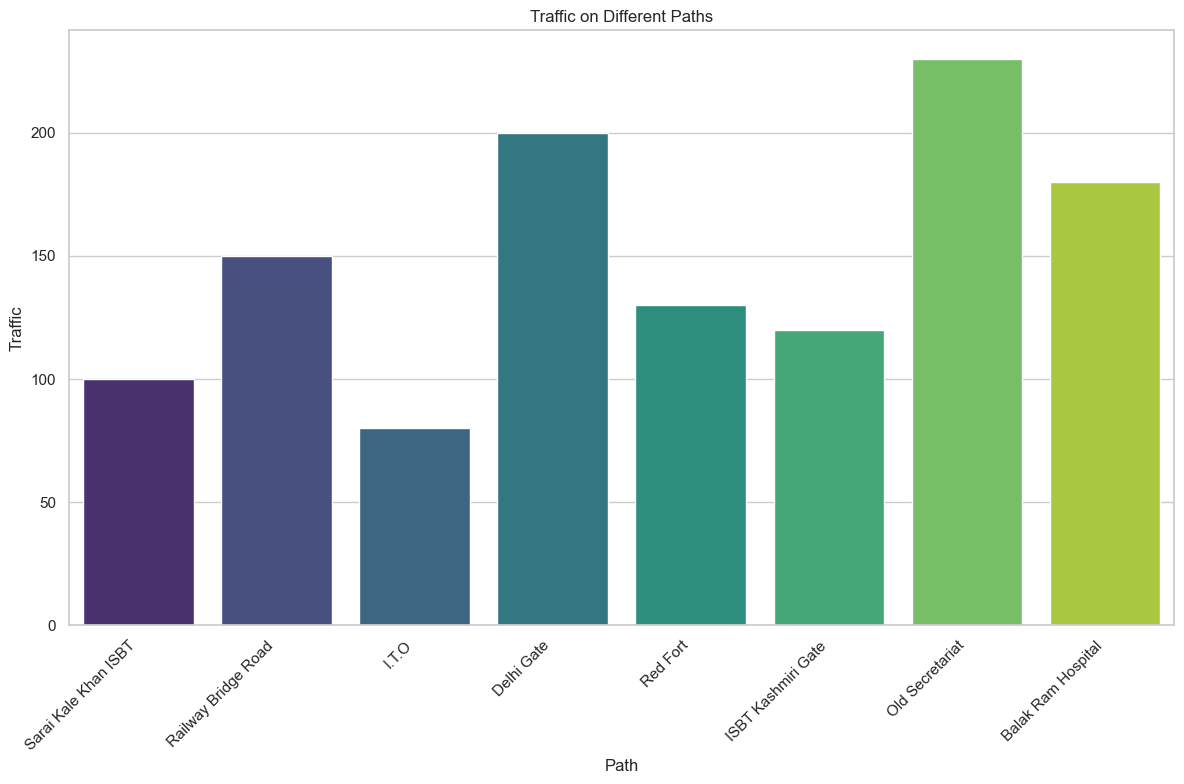

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Corrected DataFrame setup with equal length lists
data = {
    'path': [
        'Sarai Kale Khan ISBT', 'Railway Bridge Road', 'I.T.O', 
        'Delhi Gate', 'Red Fort', 'ISBT Kashmiri Gate', 'Old Secretariat', 
        'Balak Ram Hospital'
    ],
    'traffic': [100, 150, 80, 200, 130, 120, 230, 180]  # Added a missing value
}
df = pd.DataFrame(data)

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot for traffic on each path
plt.figure(figsize=(12, 8))  # Increased figure size for better readability
bar_plot = sns.barplot(x='path', y='traffic', data=df, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title('Traffic on Different Paths')
plt.xlabel('Path')
plt.ylabel('Traffic')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



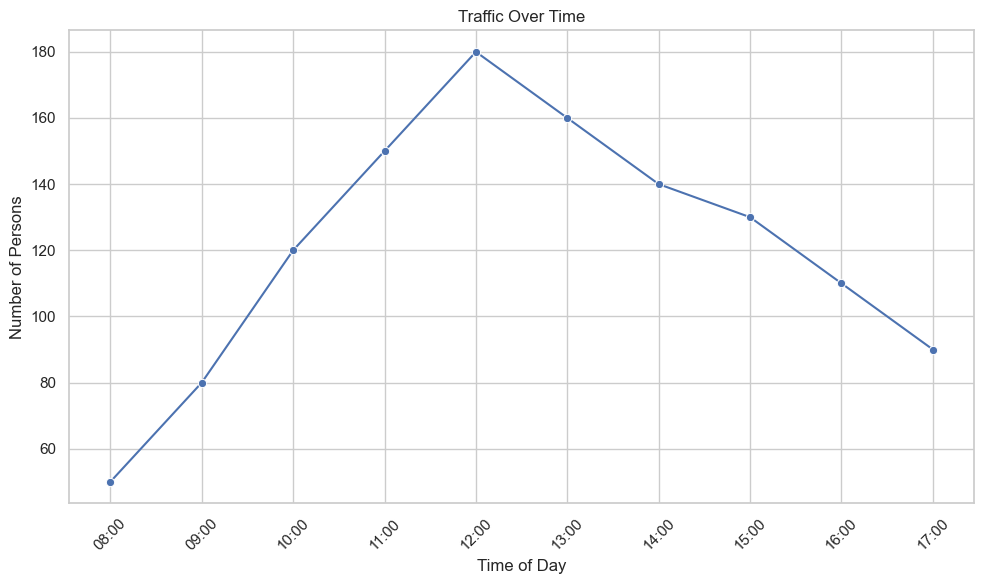

In [12]:
import pandas as pd

data = {
    'time': ['08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00'],
    'number_of_persons': [50, 80, 120, 150, 180, 160, 140, 130, 110, 90]
}

df = pd.DataFrame(data)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='number_of_persons', data=df, marker='o')
plt.title('Traffic Over Time')
plt.xlabel('Time of Day')
plt.ylabel('Number of Persons')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


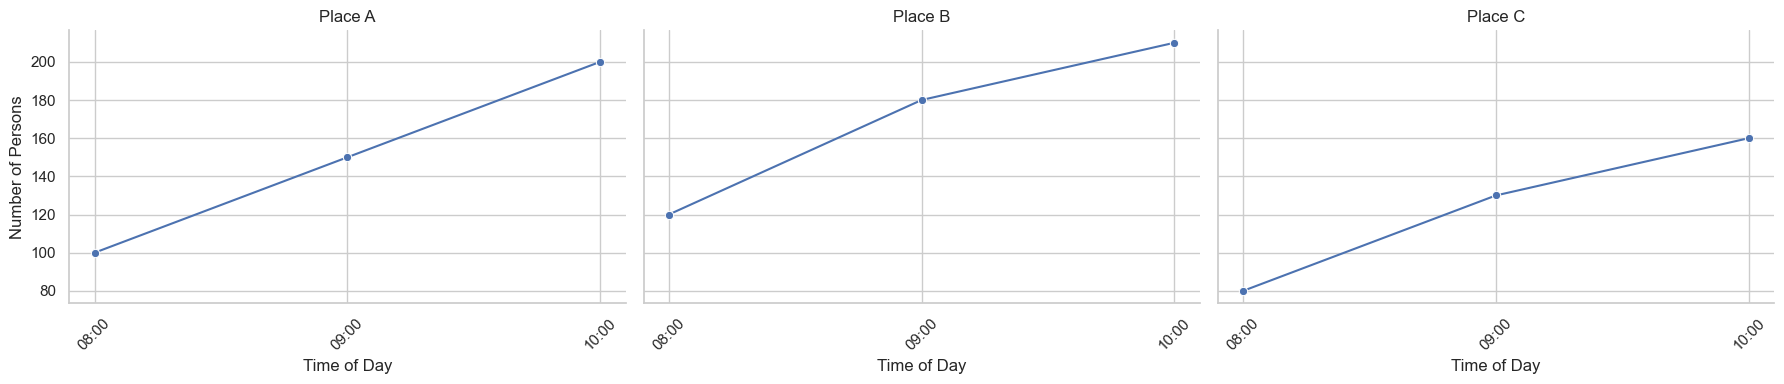

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    'place': ['Place A', 'Place A', 'Place A', 'Place B', 'Place B', 'Place B', 'Place C', 'Place C', 'Place C'],
    'time': ['08:00', '09:00', '10:00', '08:00', '09:00', '10:00', '08:00', '09:00', '10:00'],
    'number_of_persons': [100, 150, 200, 120, 180, 210, 80, 130, 160]
}
df = pd.DataFrame(data)

# Creating the FacetGrid plot
g = sns.FacetGrid(df, col="place", col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, "time", "number_of_persons", marker='o')
g.set_axis_labels("Time of Day", "Number of Persons")
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()



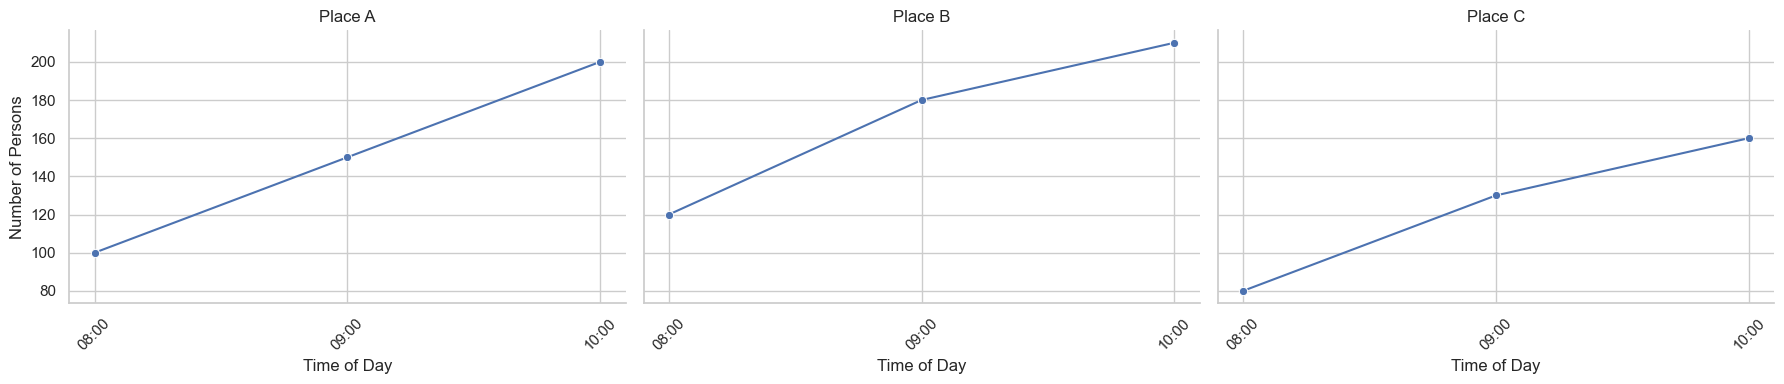

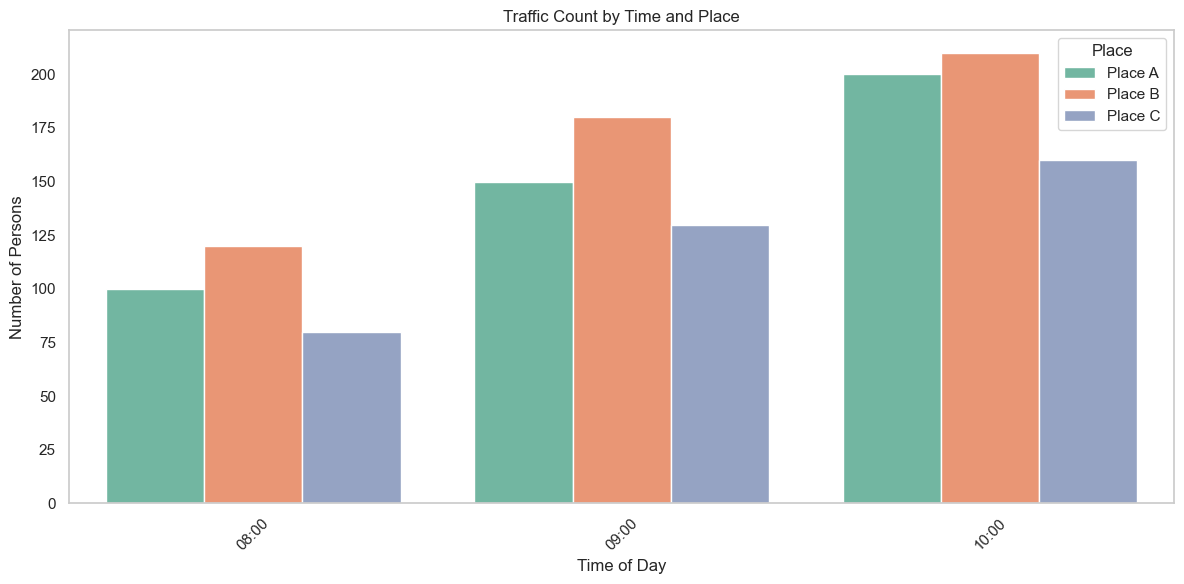

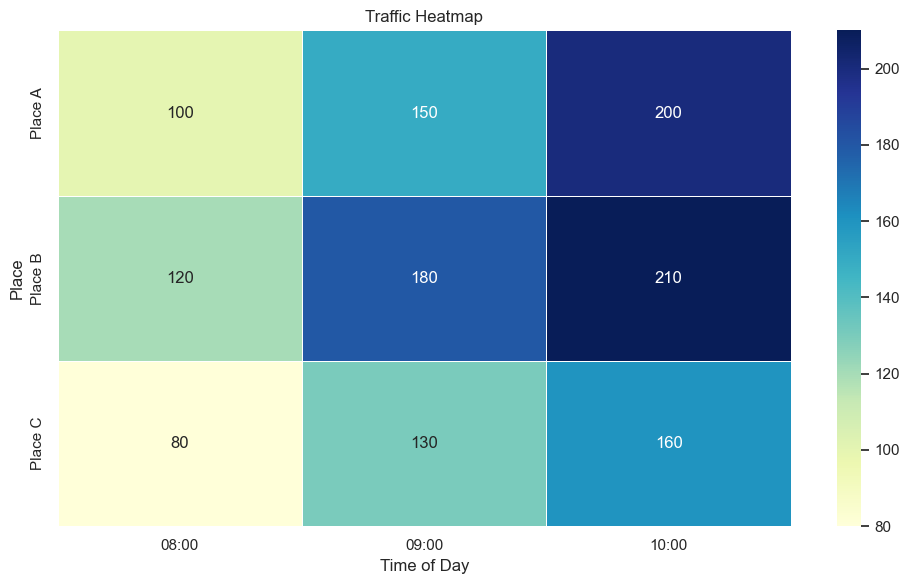

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
g = sns.FacetGrid(df, col="place", col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, "time", "number_of_persons", marker='o')
g.set_axis_labels("Time of Day", "Number of Persons")
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='time', y='number_of_persons', hue='place', data=df, palette='Set2')
plt.title('Traffic Count by Time and Place')
plt.xlabel('Time of Day')
plt.ylabel('Number of Persons')
plt.xticks(rotation=45)
plt.legend(title='Place')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Pivoting the data for the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
heatmap_data = df.pivot(index="place", columns="time", values="number_of_persons")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Traffic Heatmap')
plt.xlabel('Time of Day')
plt.ylabel('Place')
plt.tight_layout()
plt.show()

